# 1. Data import and cleaning 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

i) Read the data in the fle SeattleWeather.csv into a pandas data frame called wx. How many rows
does wx have, and what are the column names.

In [3]:
#reading the csv files
wx=pd.read_csv(r'SeattleWeather.csv',header=0)

In [4]:
#Check first 5 rows
wx.head()

,STATION,NAME,DATE,AWND,PRCP,TAVG,TMAX,TMIN
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-03,16.33,0.0,NaN,66,46
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-04,14.54,0.0,NaN,66,47
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-05,12.75,0.0,NaN,71,48
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-06,11.41,0.0,NaN,75,46
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-07,2.91,0.0,NaN,75,46


Number of Rows

In [5]:
rows = len(wx.axes[0])#wx.shape[0]
print("The number of rows in wx data: ", rows)

The number of rows in wx data:  2890


Column Names

In [6]:
print("Columns in Data wx: ")
for x in wx.columns:
    print(x)

Columns in Data wx: 
STATION
NAME
DATE
AWND
PRCP
TAVG
TMAX
TMIN


ii) Permanently remove the columns STATION and NAME from wx.

In [7]:
#dropping the columns STATION and NAME from wx.
wx=wx.drop(['STATION','NAME'],axis=1)

iii) Transform the DATE column to type datetime. In the function call, specify the date format explicitly.

In [8]:
wx['DATE'] = pd.to_datetime(wx['DATE'])#Date time

In [9]:
wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2890 entries, 0 to 2889
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2890 non-null   datetime64[ns]
 1   AWND    2889 non-null   float64       
 2   PRCP    2890 non-null   float64       
 3   TAVG    2703 non-null   float64       
 4   TMAX    2890 non-null   int64         
 5   TMIN    2890 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 135.6 KB


## 2. Exploratory Data Analysis

i) What is the highest value of wind speed (AWND) observed in the data set?

In [10]:
highest_wind_speed = wx['AWND'].max()
print("highest value of wind speed (AWND) observed in the data set:",highest_wind_speed)

highest value of wind speed (AWND) observed in the data set: 21.25


ii) On what date was the lowest minimum temperature (TMIN) observed?

In [11]:
column = wx["TMIN"]
#get index of min value
min_index = column.idxmin()
#print(min_index)
#get date
low_min_temp_date = wx.iloc[min_index, 0].date() #0 is DATE column index
print(low_min_temp_date, "had the lowest minimum temperature (TMIN) observed")

2013-12-07 had the lowest minimum temperature (TMIN) observed


iii) On how many days was the wind speed (AWND) smaller than 5 mph, and what was the average
maximum temperature (TMAX) over those days?

In [12]:
new_df = wx[(wx.AWND < 5)]
#print(new_df)
#days
num_days_awnd5 = len(new_df['DATE'])
print("For",num_days_awnd5, "days the wind speed (AWND) smaller than 5 mph")
#Average
average_tmax_awnd5 = new_df["TMAX"].mean()
print("The average maximum temperature (TMAX) over days the wind speed (AWND) smaller than 5 mph was ",
      average_tmax_awnd5)

For 555 days the wind speed (AWND) smaller than 5 mph
The average maximum temperature (TMAX) over days the wind speed (AWND) smaller than 5 mph was  60.50990990990991


iv) Create and display a new pandas data frame named prcp, with two columns called year and rain.
The rain column should contain the total (summed) precipitation amount (PRCP) per year. Then
visualise the total precipitation amount per year with a bar chart.

In [13]:
prcp = wx[['DATE','PRCP']].copy()
prcp['DATE'] = prcp["DATE"].dt.strftime('%Y')

In [14]:
prcp = prcp.groupby(['DATE']).sum().reset_index()

In [15]:
prcp = prcp.rename(columns={'DATE':'Year','PRCP':'Rain'})
prcp.columns

Index(['Year', 'Rain'], dtype='object')

In [16]:
prcp

,Year,Rain
0,2012,21.84
1,2013,32.56
2,2014,48.50
3,2015,44.83
4,2016,45.18
5,2017,47.87
6,2018,35.73
7,2019,33.88
8,2020,24.03


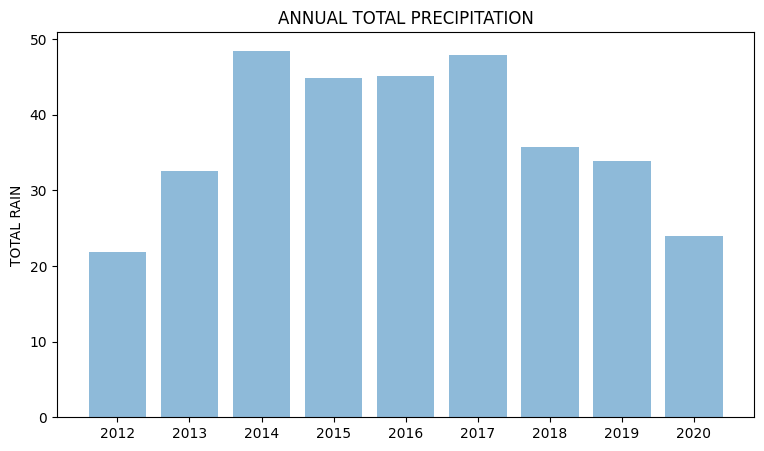

In [17]:
plt.figure(figsize=(9,5))
plt.bar(prcp['Year'],prcp['Rain'] , align='center', alpha=0.5)
plt.xticks(np.arange(prcp.shape[0]), prcp['Year'])
plt.ylabel('TOTAL RAIN')
plt.title('ANNUAL TOTAL PRECIPITATION')
plt.show()

## 3. Regression modelling

i) Create a scatter plot of maximum temperature (TMAX) versus minimum temperature (TMIN). Using
the appropriate function from Scikit-Learn, ft a linear regression model to maximum temperature,
using minimum temperature as the covariate. Add the ftted regression line to the scatter plot.

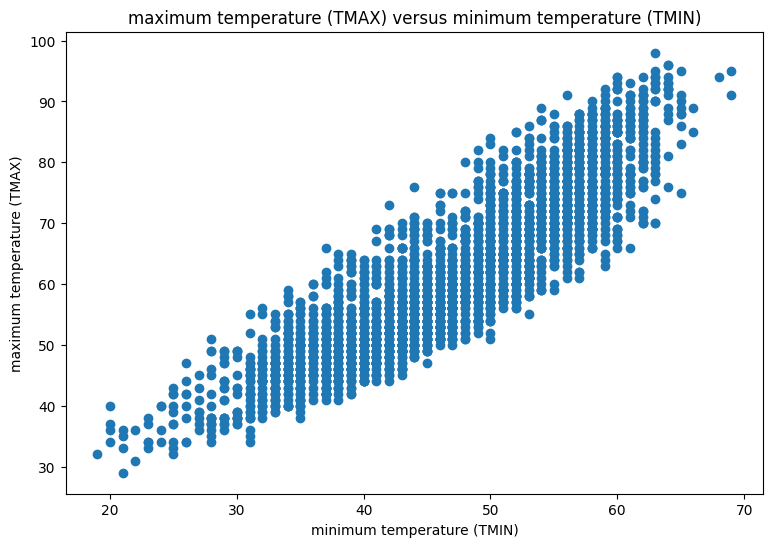

In [18]:
#scatter plot of maximum temperature (TMAX) versus minimum temperature (TMIN)
plt.figure(figsize=(9,6))
plt.scatter(x = wx['TMIN'],y = wx['TMAX'])
plt.ylabel('maximum temperature (TMAX)')
plt.xlabel('minimum temperature (TMIN)')
plt.title('maximum temperature (TMAX) versus minimum temperature (TMIN)')
plt.show()

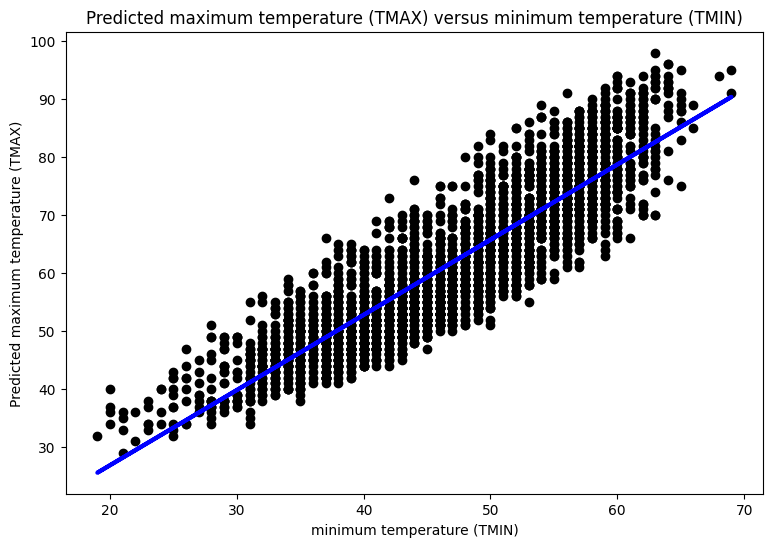

In [19]:
# Using the appropriate function from Scikit-Learn, ft a linear regression model to maximum temperature,
#using minimum temperature as the covariate
from sklearn import linear_model
#
length = wx.shape[0]
x = wx['TMIN'].values
y = wx['TMAX'].values
#
x = x.reshape(length, 1)
y = y.reshape(length, 1)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x,y)

# Add the ftted regression line to the scatter plot
plt.figure(figsize=(9,6))
plt.scatter(x,y, color = 'black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.ylabel('Predicted maximum temperature (TMAX)')
plt.xlabel('minimum temperature (TMIN)')
plt.title('Predicted maximum temperature (TMAX) versus minimum temperature (TMIN)')
plt.show()

ii) The slope coefcient of the regression line is larger than one - What does this tell us about the behavior
of daily temperature ranges in cold vs warm periods?

In [20]:
# The coefficients
print('Coefficients: ', regr.coef_[0][0])

Coefficients:  1.2957435385312712


In [21]:
print('\n',
'A unit increase in the minimum temperatures, leads to a', regr.coef_[0][0],
'unit increase in the maximum temperatures.','\n',
'As such there in an increase in maximum temperatures as minimum temperature rise,','\n',
'with the ranges fairly remaining the same in both cold and warmer periods')


 A unit increase in the minimum temperatures, leads to a 1.2957435385312712 unit increase in the maximum temperatures. 
 As such there in an increase in maximum temperatures as minimum temperature rise, 
 with the ranges fairly remaining the same in both cold and warmer periods


## 4. Model selectio

### Fit two regression models to maximum temperature (TMAX)

#### One model that only uses minimum temperature (TMIN) as the covariate

In [22]:
#Copy of data
wx_1 = wx.copy()
#using minimum temperature as the covariate
from sklearn import linear_model
#
length = wx_1.shape[0]
x = wx_1['TMIN'].values
y = wx_1['TMAX'].values
#
x = x.reshape(length, 1)
y = y.reshape(length, 1)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [23]:
# residual sum of squares SSres 
residuals_y_tmin = y - regr.predict(x)
residuals_squared_tmin = residuals_y_tmin**2
residual_sum_squares_tmin = residuals_squared_tmin.sum()
print('The residual sum of squares (SSres):',residual_sum_squares_tmin)

The residual sum of squares (SSres): 111278.9610514812


In [24]:
#total sum of squares SStot 
deviation_y_tmin = y - y.mean()
deviation_squared_tmin = deviation_y_tmin**2
total_sum_squares_tmin = deviation_squared_tmin.sum()
print('The total sum of squares SStot:',total_sum_squares_tmin)

The total sum of squares SStot: 509021.32214532874


In [25]:
# The adjusted R2
n = len(x)#n is the sample size
p = 1 # p is the number of covariates
adjusted_R2_tmin = 1 - ( ((n-1)*residual_sum_squares_tmin)/ ((n-p-1)*total_sum_squares_tmin) )
print("The adjusted R Squared (R2):", adjusted_R2_tmin)

The adjusted R Squared (R2): 0.7813107473012528


#### Another model that uses minimum temperature (TMIN) and wind speed (AWND) as two covariates

In [26]:
#Copy of data
wx_2 = wx.copy()

#using minimum temperature and wind speed as the covariate
from sklearn import linear_model
#
wx_2 = wx_2.dropna(subset=['TMIN','AWND'])
x = wx_2[['TMIN','AWND']]#x.reshape(length, 1)
y = wx_2['TMAX']#y.reshape(length, 1)
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x,y)

LinearRegression()

In [27]:
# residual sum of squares SSres 2 covariates
residuals_y_tmin_awnd = y - regr.predict(x)
residuals_squared_tmin_awnd = residuals_y_tmin_awnd**2
residual_sum_squares_tmin_awnd = residuals_squared_tmin_awnd.sum()
print('The residual sum of squares (SSres):',residual_sum_squares_tmin_awnd)

The residual sum of squares (SSres): 106090.14434102646


In [28]:
#total sum of squares SStot 2 covariates
deviation_y_tmin_awnd = y - y.mean()
deviation_squared_tmin_awnd = deviation_y_tmin_awnd**2
total_sum_squares_tmin_awnd = deviation_squared_tmin_awnd.sum()
print('The total sum of squares SStot:',total_sum_squares_tmin_awnd)

The total sum of squares SStot: 508936.74835583253


In [29]:
# The adjusted R2 2 covariates
n = len(x)#n is the sample size
p = 2 # p is the number of covariates
adjusted_R2_tmin_awnd = 1 - ( ((n-1)*residual_sum_squares_tmin_awnd)/ ((n-p-1)*total_sum_squares_tmin_awnd) )
print("The adjusted R Squared (R2):", adjusted_R2_tmin_awnd)

The adjusted R Squared (R2): 0.7914010626516027


#### Finally, based on your R2 a calculations, state your preference which of the two ftted regression models is better.

In [30]:
print('\n',
    "The adjusted R Squared (R2) for model that uses minimum temperature (TMIN) as the covariate is", '\n', 
    adjusted_R2_tmin,'\n', 
    "The adjusted R Squared (R2) for model that uses minimum temperature (TMIN) and wind speed (AWND)",
    "as two covariates: ", '\n',adjusted_R2_tmin_awnd, '\n', 
    "The preferred model is the model that uses minimum temperature (TMIN) and wind speed (AWND) as two covariates.")


 The adjusted R Squared (R2) for model that uses minimum temperature (TMIN) as the covariate is 
 0.7813107473012528 
 The adjusted R Squared (R2) for model that uses minimum temperature (TMIN) and wind speed (AWND) as two covariates:  
 0.7914010626516027 
 The preferred model is the model that uses minimum temperature (TMIN) and wind speed (AWND) as two covariates.


## 5. Graphical summary

In [31]:
wx_3 = wx[['DATE','PRCP','TMAX','TMIN']].copy()

In [32]:
wx_3.head(1)

,DATE,PRCP,TMAX,TMIN
0,2012-10-03,0.0,66,46


In [33]:
#Get Year column
wx_3['YEAR_MONTH'] = wx_3['DATE'].dt.strftime("%Y-%m")
#Drop Date Column
wx_3=wx_3.drop(['DATE'],axis=1)
wx_3['YEAR'] = wx_3['YEAR_MONTH'].apply(lambda x: x[0:4])
wx_3 = wx_3[(wx_3.YEAR == '2015')]
wx_3['MONTH'] = wx_3['YEAR_MONTH'].apply(lambda x: int(x[-2:]))
#Drop Date Column
wx_3=wx_3.drop(['YEAR_MONTH'],axis=1)

In [34]:
#The precipitation amounts sum totals
prcp_sum = wx_3.groupby(['MONTH'])['PRCP'].sum().reset_index()
prcp_sum

,MONTH,PRCP
0,1,3.66
1,2,5.27
2,3,4.47
3,4,2.03
4,5,0.58
5,6,0.23
6,7,0.09
7,8,3.28
8,9,0.83
9,10,4.81


In [35]:
#The Temperature values shown are averages
temp_ave = wx_3.groupby(['MONTH'])[['TMAX','TMIN']].mean().reset_index()
temp_ave

,MONTH,TMAX,TMIN
0,1,50.290323,39.838710
1,2,54.535714,42.964286
2,3,57.870968,43.161290
3,4,59.900000,42.833333
4,5,68.032258,50.225806
5,6,78.900000,56.433333
6,7,82.580645,59.903226
7,8,78.967742,58.451613
8,9,68.533333,52.466667
9,10,63.580645,50.903226


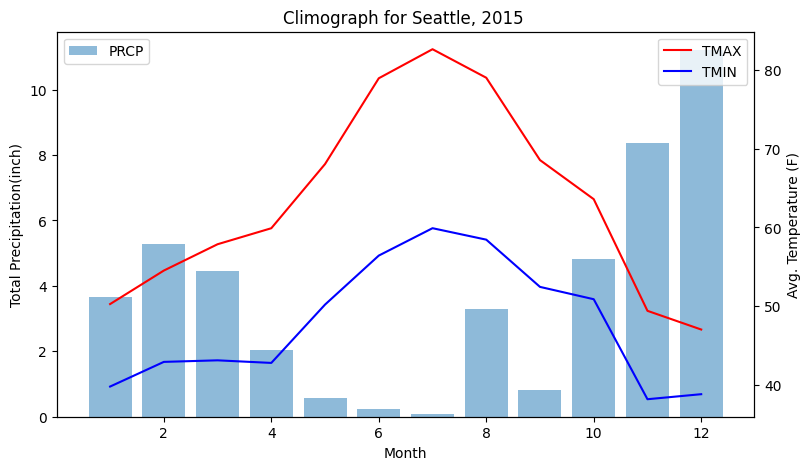

In [36]:
fig, ax  = plt.subplots(figsize=(9,5))
plt.title('Climograph for Seattle, 2015 ')

ax2 = ax.twinx()
ax.bar(prcp_sum['MONTH'],prcp_sum['PRCP'], align='center', alpha=0.5, label = 'PRCP')
ax.legend(loc=0)

#Line Plots
ax2.plot(prcp_sum['MONTH'], temp_ave['TMAX'], label='TMAX', color = "red")
ax2.plot(prcp_sum['MONTH'], temp_ave['TMIN'], label='TMIN', color = "blue")

#labels to axis
#Primary axis
ax.set_ylabel('Total Precipitation(inch)')
ax.set_xlabel('Month')

#Secondary y-axis label
ax2.set_ylabel('Avg. Temperature (F)')
plt.legend()
plt.show()